### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

### Get data right

In [2]:
bbg_data = pd.read_excel('./data_bloomberg.xlsx', index_col='Dates').dropna(axis=1, how='any')
bbg_stocks = bbg_data[bbg_data.columns.tolist()[2:]]
bbg_ri = bbg_stocks.pct_change().drop(pd.Timestamp('2004-12-31'))
bbg_rM = bbg_data['SPX Index'].pct_change().drop(pd.Timestamp('2004-12-31'))
bbg_r_f = ((1+(bbg_data['USGG3M Index'].drop(pd.Timestamp('2004-12-31'))/100))**(1/12)-1)

### Generate all the combinations

In [7]:
combs = list(itertools.combinations(bbg_stocks, 3))

In [4]:
print('There are',len(combs),'combinations.')

There are 11071620 combinations.


In [5]:
combs = combs[:2000000]
print('Trying only 2000000 combinations.')

Trying only 2000000 combinations.


### Calculate all the values

In [6]:
results = np.zeros((6,len(combs)))
index_list = []
def get_best(i):
    if i%500000 ==0:
        print(i)
    data = bbg_ri[[combs[i][0], combs[i][1], combs[i][2]]]
    mean = data.mean()*(365.25/7)
    r_f = bbg_r_f.mean()*(365.25/7)
    S = data.cov()*(365.25/7.)
    w_T = np.dot(np.linalg.inv(S), mean - r_f)/sum(np.dot(np.linalg.inv(S), mean - r_f))
    E_r_T = np.dot(w_T, mean)
    std_T = np.sqrt(np.dot(np.transpose(w_T), np.dot(S, w_T)))
    SR = (E_r_T-r_f)/std_T
    index_list.append("("+combs[i][0]+", "+combs[i][1]+", "+combs[i][2]+")")
    results[0,i] = E_r_T
    results[1,i] = std_T
    results[2,i] = SR
    for j in range(3):
        results[j+3,i] = np.transpose(w_T)[j]

[get_best(x) for x in range(len(combs))]

results_table = pd.DataFrame(results.T,columns=['ret','stdev','sharpe','w0', 'w1','w2'], index=index_list)

results_table.to_csv('q5.csv')


0
500000
1000000
1500000


In [7]:
results_table.head()

,ret,stdev,sharpe,w0,w1,w2
"(A UN Equity, AAP UN Equity, AAPL UW Equity)",0.333118,0.319116,0.883917,0.004914,0.057025,0.938061
"(A UN Equity, AAP UN Equity, ABC UN Equity)",0.162687,0.193074,0.578234,0.155358,0.158288,0.686354
"(A UN Equity, AAP UN Equity, ABT UN Equity)",0.136274,0.183803,0.463696,0.328338,0.219426,0.452236
"(A UN Equity, AAP UN Equity, ACN UN Equity)",0.169976,0.214965,0.553257,0.141223,0.169953,0.688825
"(A UN Equity, AAP UN Equity, ADBE UW Equity)",0.166702,0.234863,0.492442,0.280321,0.232054,0.487625


### Check max and min values per column

In [8]:
results_table.idxmax()

ret        (ALGN UW Equity, APA UN Equity, PDCO UW Equity)
stdev         (AIV UN Equity, DRE UN Equity, GE UN Equity)
sharpe    (AAPL UW Equity, MNST UW Equity, PCLN UW Equity)
w0         (ALGN UW Equity, APA UN Equity, PDCO UW Equity)
w1          (AES UN Equity, PDCO UW Equity, REG UN Equity)
w2            (AIV UN Equity, DRE UN Equity, GE UN Equity)
dtype: object

In [9]:
results_table.idxmin()

ret          (AIV UN Equity, DRE UN Equity, GE UN Equity)
stdev        (AJG UN Equity, ED UN Equity, JNJ UN Equity)
sharpe      (ALGN UW Equity, GE UN Equity, LNC UN Equity)
w0           (AIV UN Equity, DRE UN Equity, GE UN Equity)
w1           (AIV UN Equity, DRE UN Equity, GE UN Equity)
w2        (ALGN UW Equity, APA UN Equity, PDCO UW Equity)
dtype: object

### Present the values for the portfolio with the biggest sharpe ratio

In [10]:
results_table.idxmax()[0]

'(ALGN UW Equity, APA UN Equity, PDCO UW Equity)'

In [11]:
results_table.loc[[results_table.idxmax()[0]]]

,ret,stdev,sharpe,w0,w1,w2
"(ALGN UW Equity, APA UN Equity, PDCO UW Equity)",2141.887961,3057.196737,0.700589,6396.661635,-870.881293,-5524.780342


### Plot all the porfolios

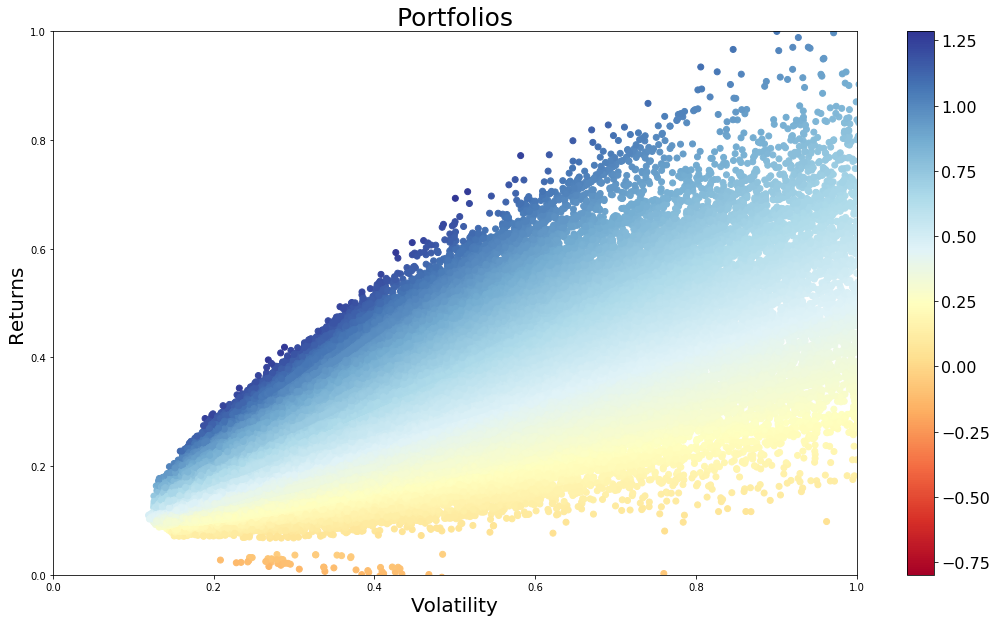

In [12]:
# Set configuration of the graph
plt.figure(figsize=(18, 10))
plt.xlabel('Volatility', fontsize=20)
plt.ylabel('Returns', fontsize=20)
plt.ylim(ymin=0)
plt.xlim(xmin=0)

## Define the labels
plt.title('Portfolios', fontsize=25)

plt.rc('font', size=16) 

# Create scatter plot coloured by Sharpe Ratio
plt.scatter(results_table.stdev,results_table.ret,c=results_table.sharpe,cmap='RdYlBu')    
plt.colorbar()

In [8]:
combs = combs[:10000]
print('Trying only 200 combinations.')

Trying only 200 combinations.


In [9]:
results = np.zeros((6,len(combs)))
index_list = []
def get_best(i):
    if i%500000 ==0:
        print(i)
    data = bbg_ri[[combs[i][0], combs[i][1], combs[i][2]]]
    mean = data.mean()*(365.25/7)
    r_f = bbg_r_f.mean()*(365.25/7)
    S = data.cov()*(365.25/7.)
    w_T = np.dot(np.linalg.inv(S), mean - r_f)/sum(np.dot(np.linalg.inv(S), mean - r_f))
    E_r_T = np.dot(w_T, mean)
    std_T = np.sqrt(np.dot(np.transpose(w_T), np.dot(S, w_T)))
    SR = (E_r_T-r_f)/std_T
    index_list.append("("+combs[i][0]+", "+combs[i][1]+", "+combs[i][2]+")")
    results[0,i] = E_r_T
    results[1,i] = std_T
    results[2,i] = SR
    for j in range(3):
        results[j+3,i] = np.transpose(w_T)[j]

[get_best(x) for x in range(len(combs))]

results_table = pd.DataFrame(results.T,columns=['ret','stdev','sharpe','w0', 'w1','w2'], index=index_list)

0


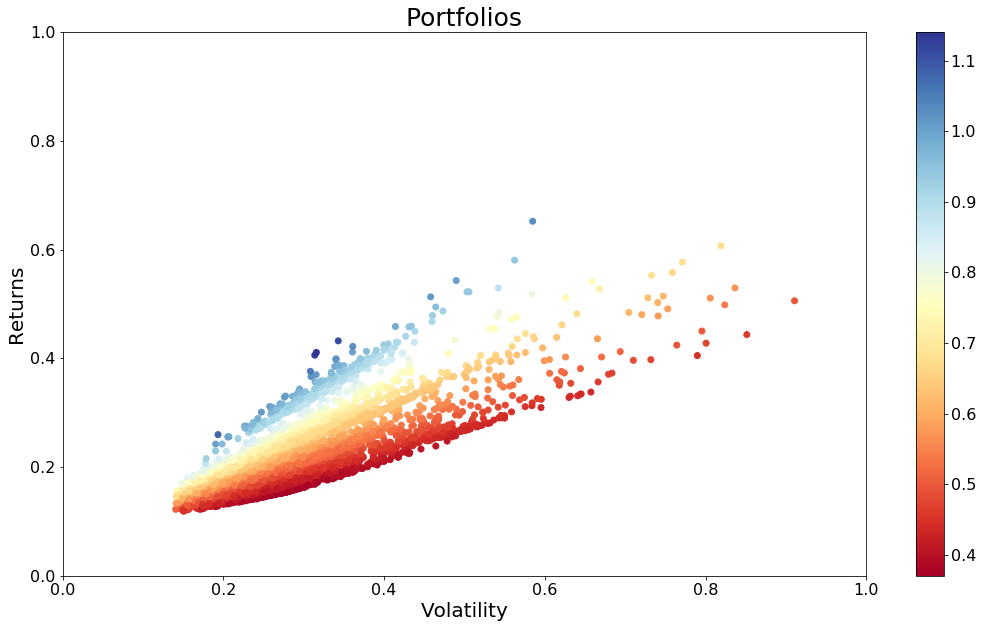

In [10]:
# Set configuration of the graph
plt.figure(figsize=(18, 10))
plt.xlabel('Volatility', fontsize=20)
plt.ylabel('Returns', fontsize=20)
plt.ylim(ymin=0)
plt.xlim(xmin=0)

## Define the labels
plt.title('Portfolios', fontsize=25)

plt.rc('font', size=16) 

# Create scatter plot coloured by Sharpe Ratio
plt.scatter(results_table.stdev,results_table.ret,c=results_table.sharpe,cmap='RdYlBu')    
plt.colorbar()

In [ ]:
bb

In [11]:
combs = combs[:2000]
print('Trying only 200 combinations.')

Trying only 200 combinations.


In [12]:
results = np.zeros((6,len(combs)))
index_list = []
def get_best(i):
    if i%500000 ==0:
        print(i)
    data = bbg_ri[[combs[i][0], combs[i][1], combs[i][2]]]
    mean = data.mean()*(365.25/7)
    r_f = bbg_r_f.mean()*(365.25/7)
    S = data.cov()*(365.25/7.)
    w_T = np.dot(np.linalg.inv(S), mean - r_f)/sum(np.dot(np.linalg.inv(S), mean - r_f))
    E_r_T = np.dot(w_T, mean)
    std_T = np.sqrt(np.dot(np.transpose(w_T), np.dot(S, w_T)))
    SR = (E_r_T-r_f)/std_T
    index_list.append("("+combs[i][0]+", "+combs[i][1]+", "+combs[i][2]+")")
    results[0,i] = E_r_T
    results[1,i] = std_T
    results[2,i] = SR
    for j in range(3):
        results[j+3,i] = np.transpose(w_T)[j]

[get_best(x) for x in range(len(combs))]

results_table = pd.DataFrame(results.T,columns=['ret','stdev','sharpe','w0', 'w1','w2'], index=index_list)

0


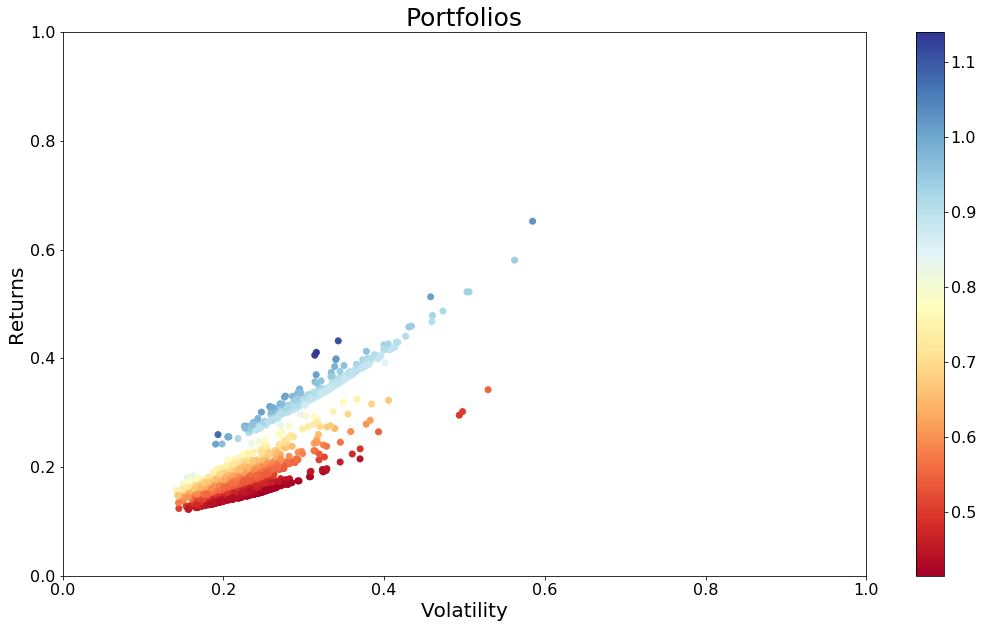

In [13]:
# Set configuration of the graph
plt.figure(figsize=(18, 10))
plt.xlabel('Volatility', fontsize=20)
plt.ylabel('Returns', fontsize=20)
plt.ylim(ymin=0)
plt.xlim(xmin=0)

## Define the labels
plt.title('Portfolios', fontsize=25)

plt.rc('font', size=16) 

# Create scatter plot coloured by Sharpe Ratio
plt.scatter(results_table.stdev,results_table.ret,c=results_table.sharpe,cmap='RdYlBu')    
plt.colorbar()